# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Mohammad Usama Bedeir

ID:49-8386

Tutorial:T-5

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [544]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [545]:
# Information on all the different columns of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [546]:
# Generating descriptive statistics on the different numerical columns in the data
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [547]:
# Check if missing values exits
# We find that there are no missing values and hence we will not be needing to fill any missing values
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [548]:
# We now start the data pre-processing and cleaning phase with fixing the datatypes in the dataframe
# We start by looking at the current data types
# We find several issues in the datatypes of several columns, which we will be fixing in the next few steps using
# the most appropriate methods for each column
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer         object
color            object
interior         object
seller           object
mmr              object
sellingprice     object
saledate         object
dtype: object

In [549]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [550]:
# We start with the odometer column which should be of type int and not an object. To do that we need to first remove the
# 'mi' miles indicator and then convert it to an int
df['odometer'] = df['odometer'].str.extract('([0-9]+)', expand=False).astype(int)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [551]:
# Same needs to be done with the mmr and selling price columns as we need to remove the dollar sign and then
# convert the column to an int
df['mmr'] = df['mmr'].str.extract('([0-9]+)', expand=False).astype(int)
df['sellingprice'] = df['sellingprice'].str.extract('([0-9]+)', expand=False).astype(int)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,gray,wheels exchange llc,15650,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [552]:
# We take a quick look at new datatypes now
# We see that they have been corrected
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer          int32
color            object
interior         object
seller           object
mmr               int32
sellingprice      int32
saledate         object
dtype: object

In [553]:
# We also need to fix the body column as it is not consistent and we need to end up with just the following categories
# of models: Sedan, Coupe, Convertible, Hatchback, SUV, Minivan, Wagon, and Pickup Truck.
# Pickup trucks are indicated by their different cab types in the ‘body’ column.

# As we can see using the method value_counts many more categories exist that need to be grouped in the 
# aforementioned categories
df['body'].value_counts().tail(30)

Access Cab                 15
Koup                       12
Promaster Cargo Van         9
g convertible               8
CTS Coupe                   8
crewmax cab                 8
Beetle Convertible          8
king cab                    7
Elantra Coupe               6
genesis coupe               5
mega cab                    5
Xtracab                     4
access cab                  4
Mega Cab                    3
Q60 Convertible             2
G37 Convertible             2
cts coupe                   2
Q60 Coupe                   2
CTS-V Coupe                 2
TSX Sport Wagon             2
Cab Plus 4                  2
beetle convertible          1
regular-cab                 1
GranTurismo Convertible     1
tsx sport wagon             1
CTS Wagon                   1
granturismo convertible     1
promaster cargo van         1
Transit Van                 1
xtracab                     1
Name: body, dtype: int64

In [554]:
# To make things easier, we will copy the body column in a seperate variable and we will
# convert all the strings in the body column to small letters
body = df['body']
body.value_counts()

Sedan                      17171
SUV                         9942
sedan                       3686
suv                         1994
Hatchback                   1869
                           ...  
CTS Wagon                      1
granturismo convertible        1
promaster cargo van            1
Transit Van                    1
xtracab                        1
Name: body, Length: 71, dtype: int64

In [555]:
# we will convert all the strings in the body column to small letters
body = body.str.lower()
body.value_counts()

sedan                      20857
suv                        11936
hatchback                   2270
minivan                     2189
coupe                       1563
wagon                       1434
crew cab                    1409
convertible                  919
supercrew                    740
g sedan                      717
supercab                     433
regular cab                  399
extended cab                 397
van                          332
quad cab                     318
g coupe                      170
double cab                   137
e-series van                 100
crewmax cab                   52
king cab                      40
g convertible                 30
genesis coupe                 22
access cab                    19
club cab                      17
koup                          12
cts coupe                     10
promaster cargo van           10
beetle convertible             9
mega cab                       8
elantra coupe                  6
xtracab   

In [556]:
# We are making progress. We realize that the sedan, coupe, and convertible have another version of them starting with a
# 'g' so we remove these too and group them

# body[body.str.startswith('g ')].unique()

In [557]:
# body = body[body.str.startswith('g ')].str.replace('g ', '').str.strip()
# body

In [558]:
# body = body.apply(lambda x: x.replace('g ', '') if x.startswith('g ') else x )

In [559]:
# We have solved all issues relating to sedan and we continue our process
body.value_counts()

sedan                      20857
suv                        11936
hatchback                   2270
minivan                     2189
coupe                       1563
wagon                       1434
crew cab                    1409
convertible                  919
supercrew                    740
g sedan                      717
supercab                     433
regular cab                  399
extended cab                 397
van                          332
quad cab                     318
g coupe                      170
double cab                   137
e-series van                 100
crewmax cab                   52
king cab                      40
g convertible                 30
genesis coupe                 22
access cab                    19
club cab                      17
koup                          12
cts coupe                     10
promaster cargo van           10
beetle convertible             9
mega cab                       8
elantra coupe                  6
xtracab   

In [615]:
body = body.apply(lambda x: 'sedan' if 'sedan' in x  else x)
body = body.apply(lambda x: 'coupe' if 'coupe' in x or 'koup' in x else x)
body = body.apply(lambda x: 'convertible' if 'convertible' in x else x)
body = body.apply(lambda x: 'minivan' if 'van' in x else x)
body = body.apply(lambda x: 'pickup truck' if 'cab' in x or 'super' in x else x)
body = body.apply(lambda x: 'wagon' if 'wagon' in x else x)
body = body.str.capitalize()

In [561]:
# Now we have our 8 categories of car body
body.value_counts()

Sedan           21586
Suv             11936
Pickup truck     3977
Minivan          2632
Hatchback        2270
Coupe            1775
Wagon            1438
Convertible       964
Name: body, dtype: int64

In [616]:
df['body'] = body
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00
1,2014,Toyota,4Runner,SR5,Suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,gray,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00
3,2002,BMW,X5,4.4i,Suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,automatic,2fmdk4gc2dbc03247,va,3.5,52844,gray,gray,wheels exchange llc,15650,17000,2015-01-07 01:30:00+00:00
46574,2012,Infiniti,G Sedan,G37 Journey,Sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,2015-06-17 22:30:00+00:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,2015-02-17 18:00:00+00:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,2015-01-13 20:30:00+00:00


In [617]:
# We also have a blank variable in the interior column which we need to deal with
df['interior'].value_counts()

black        21173
gray         15364
beige         5016
tan           3859
brown          711
blue           103
red             92
silver          89
off-white       40
purple          32
gold            27
white           23
burgundy        20
green           17
orange          11
yellow           1
Name: interior, dtype: int64

In [618]:
# We deal with this by forward filling the data in order to fill blank spaces
df['interior'].replace('—', np.nan, inplace=True)
df['interior'].ffill(inplace=True)
df['color'].replace('—', np.nan, inplace=True)
df['color'].ffill(inplace=True)

In [619]:
df['saledate'] = pd.to_datetime(df['saledate'], utc=True, errors='coerce')
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00
1,2014,Toyota,4Runner,SR5,Suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,gray,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00
3,2002,BMW,X5,4.4i,Suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,automatic,2fmdk4gc2dbc03247,va,3.5,52844,gray,gray,wheels exchange llc,15650,17000,2015-01-07 01:30:00+00:00
46574,2012,Infiniti,G Sedan,G37 Journey,Sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,2015-06-17 22:30:00+00:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,2015-02-17 18:00:00+00:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,2015-01-13 20:30:00+00:00


In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          46578 non-null  int64              
 1   make          46578 non-null  object             
 2   model         46578 non-null  object             
 3   trim          46578 non-null  object             
 4   body          46578 non-null  object             
 5   transmission  46578 non-null  object             
 6   vin           46578 non-null  object             
 7   state         46578 non-null  object             
 8   condition     46578 non-null  float64            
 9   odometer      46578 non-null  int32              
 10  color         46578 non-null  object             
 11  interior      46578 non-null  object             
 12  seller        46578 non-null  object             
 13  mmr           46578 non-null  int32              
 14  sellin

In [621]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00
1,2014,Toyota,4Runner,SR5,Suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,gray,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00
3,2002,BMW,X5,4.4i,Suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,automatic,2fmdk4gc2dbc03247,va,3.5,52844,gray,gray,wheels exchange llc,15650,17000,2015-01-07 01:30:00+00:00
46574,2012,Infiniti,G Sedan,G37 Journey,Sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,2015-06-17 22:30:00+00:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,2015-02-17 18:00:00+00:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,2015-01-13 20:30:00+00:00


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<AxesSubplot:xlabel='color', ylabel='count'>

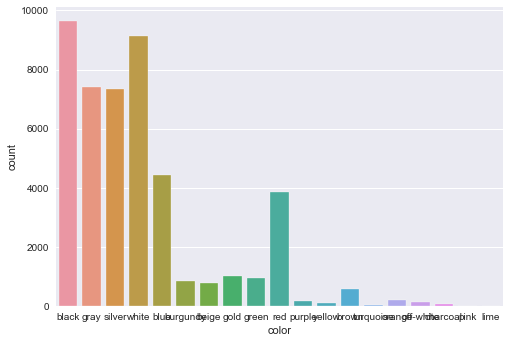

In [622]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

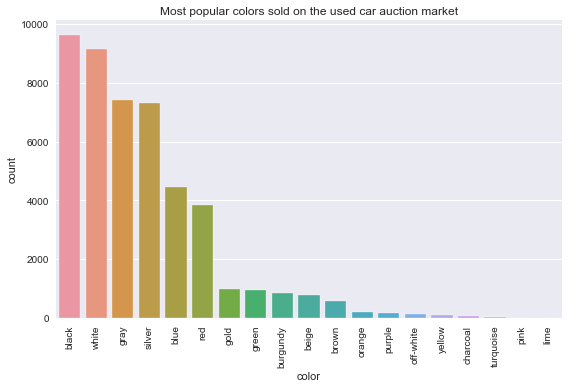

In [623]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

In [624]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-01 19:30:00+00:00
1,2014,Toyota,4Runner,SR5,Suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,gray,award auto sales and leasing inc,28700,29900,2015-02-17 23:15:00+00:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-19 17:30:00+00:00
3,2002,BMW,X5,4.4i,Suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-03 23:10:00+00:00
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-17 22:45:00+00:00


In [625]:
ordered = df.groupby('make').size().sort_values(ascending = False)

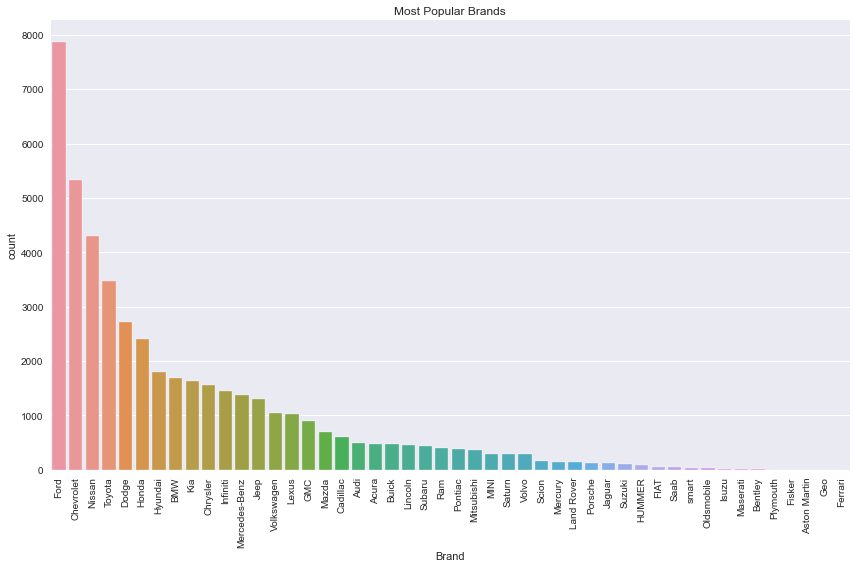

In [626]:
plt.figure(figsize=(12,8))
ordered = df.groupby('make').size().sort_values(ascending = False)
sns.countplot(x='make', data=df, order = ordered.index)
plt.xticks(rotation=90)
plt.title('Most Popular Brands')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()

**Answer for Q1**: The three most popular car brands are Ford, Chevrolet, and Nissan based on the above visualization

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

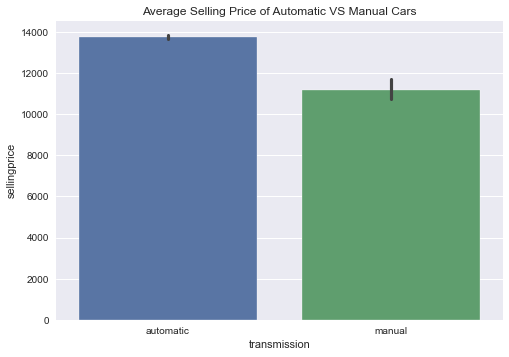

In [627]:
sns.barplot(x='transmission', y='sellingprice',data=df)
plt.title('Average Selling Price of Automatic VS Manual Cars')
plt.show()

**Answer for Q2**: Yes, automatic cars, on average, do sell for a higher price than manual prices

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

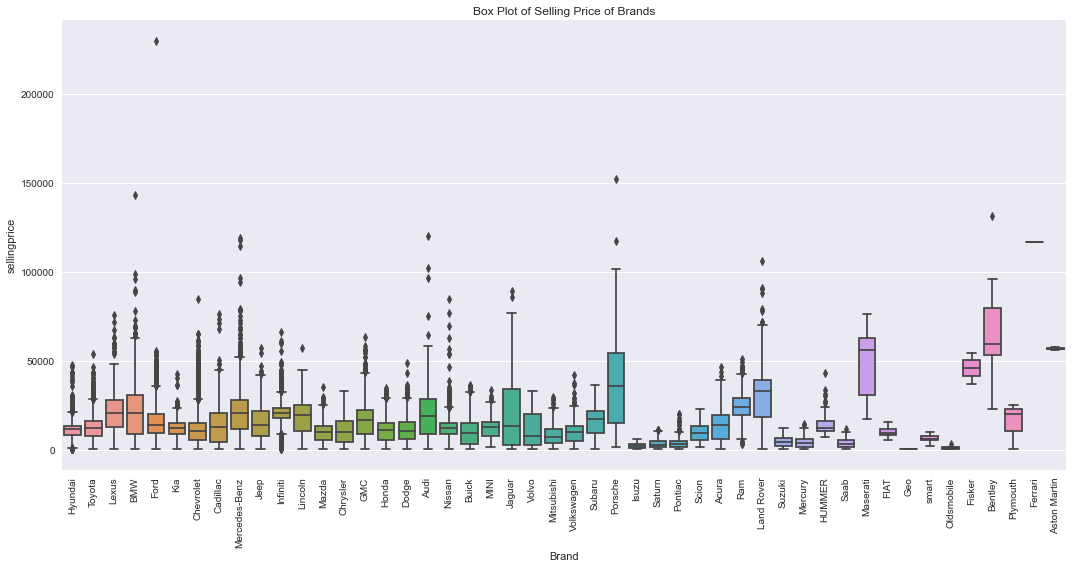

In [634]:
plt.figure(figsize=(15,8))
sns.boxplot(x='make', y='sellingprice', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Selling Price of Brands')
plt.xlabel('Brand')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

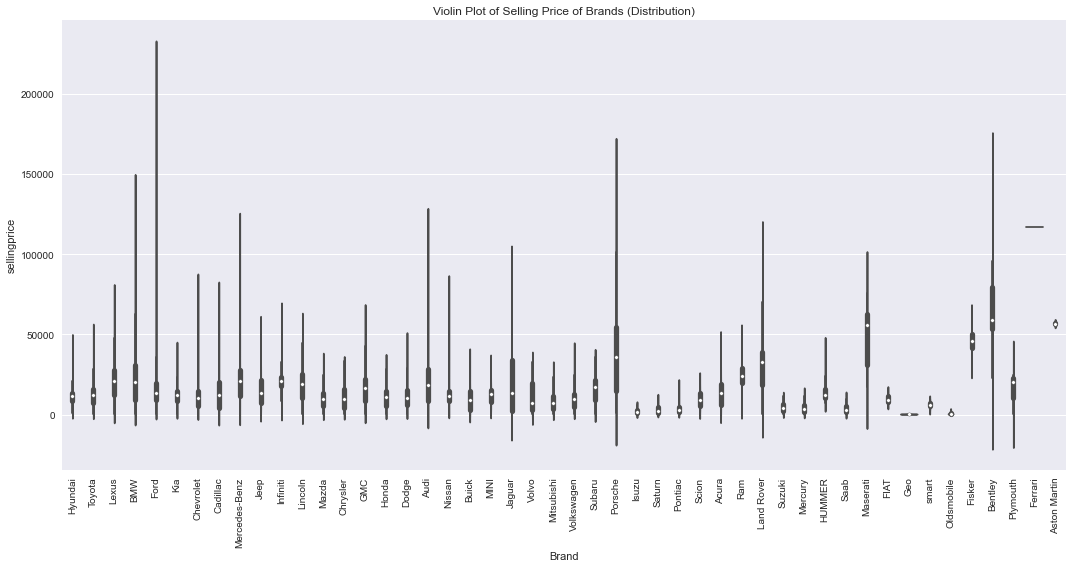

In [648]:
plt.figure(figsize=(15,8))
sns.violinplot(x='make', y='sellingprice', data=df, palette='Wistia')
plt.xticks(rotation=90)
plt.title('Violin Plot of Selling Price of Brands (Distribution)')
plt.xlabel('Brand')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

**Answer for Q3**: Masserati and Porsche have the widest distributions of selling prices. Moreover, Ford and Porsche also have the cars with the highest prices.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

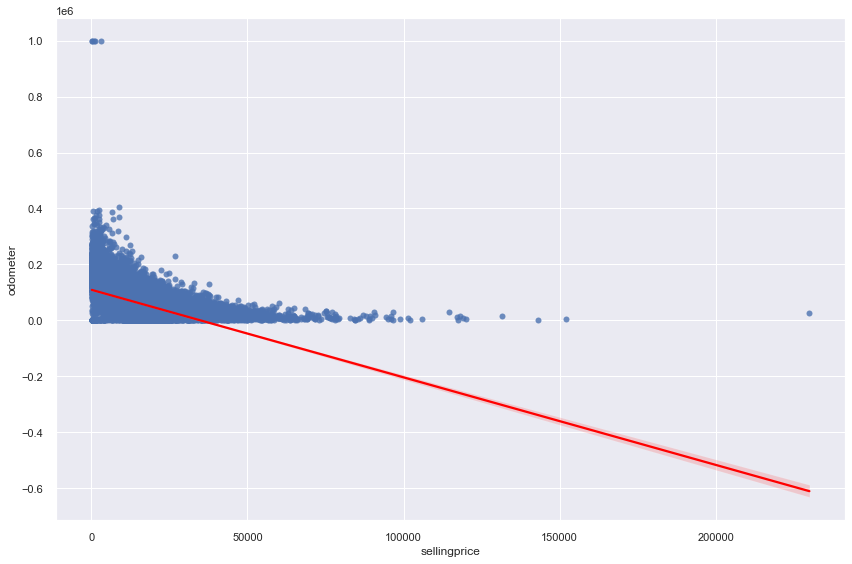

In [682]:
# This line shows the negative correlation between both variables but it seems like the outliers are skewing the graph
# So, lets also try to remove outliers and draw a line of best fit
plt.figure(figsize=(12,8))
sns.regplot(y='odometer', x='sellingprice', data=df,line_kws={'color': 'red'})
plt.tight_layout()

In [683]:
# We remove the outliers by only getting data between the 5th and 95th percentile
df.sellingprice.quantile([0.05,0.95])

0.05     1600.0
0.95    30600.0
Name: sellingprice, dtype: float64

In [684]:
no_outliers = df[(df['sellingprice']>1600) & (df['sellingprice']<30600)]

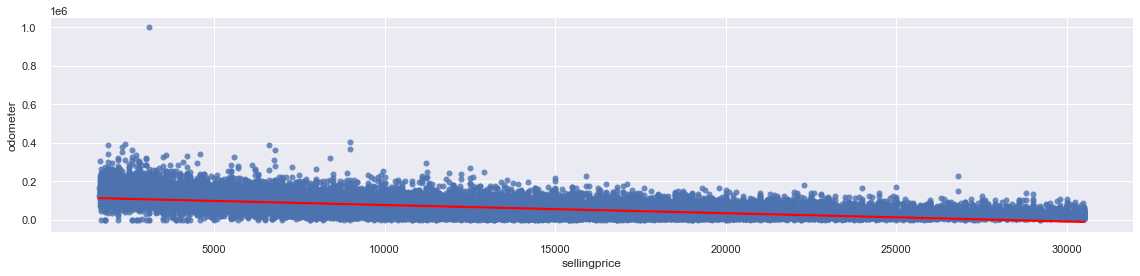

In [686]:
# AS we can see, the line is still sloping downwards hence solidifying our opinion that they are negatively correlated
sns.lmplot(y='odometer', x='sellingprice', data=no_outliers, line_kws={'color': 'red'}, height =4, aspect=4)
plt.tight_layout()

**Answer for Q4**: There is  negative correlation beteen the odometer and selling price as the higher the odometer
the lower the selling price. This is because the line of best fit is downward sloping which shows negative
correlation.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

<Figure size 864x576 with 0 Axes>

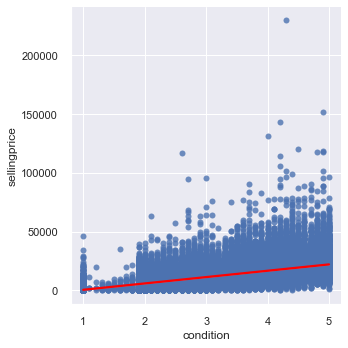

In [687]:
plt.figure(figsize=(12,8))
sns.lmplot(x='condition', y='sellingprice', data=df, line_kws={'color': 'red'})
plt.tight_layout()

**Answer for Q5**: SInce the line is sloping upwards, then there is a positive correlation between car condition and
its selling price

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

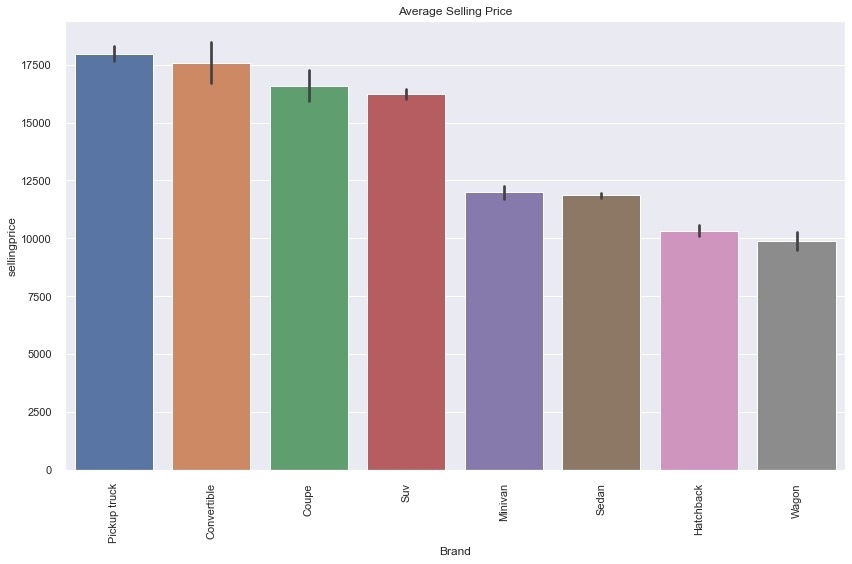

In [692]:
plt.figure(figsize=(12,8))
ordered = df.groupby('body')['sellingprice'].mean().sort_values(ascending = False)
sns.barplot(x='body', y='sellingprice',data=df, order = ordered.index)
plt.xticks(rotation=90)
plt.title('Average Selling Price')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()

**Answer for Q6**: Yes, there 

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

## Modelling

_Apply the linear regression model below._

## Model Evaluation

_Evaluate the model you applied._

## Model Validation (Optional)

_Check if the model you applied meets the necessary assumptions for the chosen model._

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.